In [17]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from icecream import ic

In [18]:
data = [
            {
                "$id": "2",
                "date": "2024-01-01T23:00:00Z",
                "price": 23.92
            },
            {
                "$id": "3",
                "date": "2024-01-02T00:00:00Z",
                "price": 17.7
            },
            {
                "$id": "4",
                "date": "2024-01-02T01:00:00Z",
                "price": 12.39
            },
            {
                "$id": "5",
                "date": "2024-01-02T02:00:00Z",
                "price": 7.35
            },
            {
                "$id": "6",
                "date": "2024-01-02T03:00:00Z",
                "price": 4.19
            },
            {
                "$id": "7",
                "date": "2024-01-02T04:00:00Z",
                "price": 4.75
            },
            {
                "$id": "8",
                "date": "2024-01-02T05:00:00Z",
                "price": 31.59
            },
            {
                "$id": "9",
                "date": "2024-01-02T06:00:00Z",
                "price": 49.96
            },
            {
                "$id": "10",
                "date": "2024-01-02T07:00:00Z",
                "price": 58.46
            },
            {
                "$id": "11",
                "date": "2024-01-02T08:00:00Z",
                "price": 59.05
            },
            {
                "$id": "12",
                "date": "2024-01-02T09:00:00Z",
                "price": 68.65
            },
            {
                "$id": "13",
                "date": "2024-01-02T10:00:00Z",
                "price": 74.18
            },
            {
                "$id": "14",
                "date": "2024-01-02T11:00:00Z",
                "price": 65.02
            },
            {
                "$id": "15",
                "date": "2024-01-02T12:00:00Z",
                "price": 64.71
            },
            {
                "$id": "16",
                "date": "2024-01-02T13:00:00Z",
                "price": 66.74
            },
            {
                "$id": "17",
                "date": "2024-01-02T14:00:00Z",
                "price": 64.43
            },
            {
                "$id": "18",
                "date": "2024-01-02T15:00:00Z",
                "price": 65.04
            },
            {
                "$id": "19",
                "date": "2024-01-02T16:00:00Z",
                "price": 73.85
            },
            {
                "$id": "20",
                "date": "2024-01-02T17:00:00Z",
                "price": 66.62
            },
            {
                "$id": "21",
                "date": "2024-01-02T18:00:00Z",
                "price": 64.36
            },
            {
                "$id": "22",
                "date": "2024-01-02T19:00:00Z",
                "price": 60
            },
            {
                "$id": "23",
                "date": "2024-01-02T20:00:00Z",
                "price": 49.5
            },
            {
                "$id": "24",
                "date": "2024-01-02T21:00:00Z",
                "price": 44.19
            },
            {
                "$id": "25",
                "date": "2024-01-02T22:00:00Z",
                "price": 26.83
            }
        ]

In [19]:
df = pd.DataFrame(data)

In [8]:
df

,$id,date,price
0,2,2024-01-01T23:00:00Z,23.92
1,3,2024-01-02T00:00:00Z,17.70
2,4,2024-01-02T01:00:00Z,12.39
3,5,2024-01-02T02:00:00Z,7.35
4,6,2024-01-02T03:00:00Z,4.19
5,7,2024-01-02T04:00:00Z,4.75
6,8,2024-01-02T05:00:00Z,31.59
7,9,2024-01-02T06:00:00Z,49.96
8,10,2024-01-02T07:00:00Z,58.46
9,11,2024-01-02T08:00:00Z,59.05


In [20]:
price_column_name = "price"


ev_comfort_charge_capacity_kwh = int(0.8 * 60)  # 80% of 60kWh
ev_max_charge_capacity_kwh = 60  # 60kWh
buffer = 0.5  # 50%


# hardcoded for now
ev_pmax = 22  # kW
ev_charged_per_hour = ev_pmax  # kWh


ev_charging_hours_count_comfort = ev_comfort_charge_capacity_kwh / ev_charged_per_hour
ev_charging_hours_count_max = ev_max_charge_capacity_kwh / ev_charged_per_hour
total_hours_count = len(df)
ic(ev_charging_hours_count_comfort, ev_charging_hours_count_max, total_hours_count)

ic(ev_charging_hours_count_comfort / total_hours_count)

percent_of_hours_needed_comfort = ev_charging_hours_count_comfort / total_hours_count
percent_of_hours_needed_max = ev_charging_hours_count_max / total_hours_count
ic(percent_of_hours_needed_comfort, percent_of_hours_needed_max)

percent_of_hours_needed_comfort = percent_of_hours_needed_comfort * (1 + buffer)
percent_of_hours_needed_max = percent_of_hours_needed_max * (1 + buffer)
ic(percent_of_hours_needed_comfort, percent_of_hours_needed_max)

df['is_in_lowest_hours_comfort'] = df[price_column_name] <= df[price_column_name].quantile(percent_of_hours_needed_comfort)

df['is_in_lowest_hours_max'] = df[price_column_name] <= df[price_column_name].quantile(percent_of_hours_needed_max)


ic| ev_charging_hours_count_comfort: 2.1818181818181817
    ev_charging_hours_count_max: 2.727272727272727
    total_hours_count: 24
ic| ev_charging_hours_count_comfort / total_hours_count: 0.0909090909090909
ic| percent_of_hours_needed_comfort: 0.0909090909090909
    percent_of_hours_needed_max: 0.11363636363636363
ic| percent_of_hours_needed_comfort: 0.13636363636363635
    percent_of_hours_needed_max: 0.17045454545454544


In [21]:
highest_price_in_lowest_hours_comfort = df[df['is_in_lowest_hours_comfort']][price_column_name].max()

highest_price_in_lowest_hours_max = df[df['is_in_lowest_hours_max']][price_column_name].max()

In [22]:
highest_price_in_lowest_hours_comfort, highest_price_in_lowest_hours_max

(12.39, 12.39)

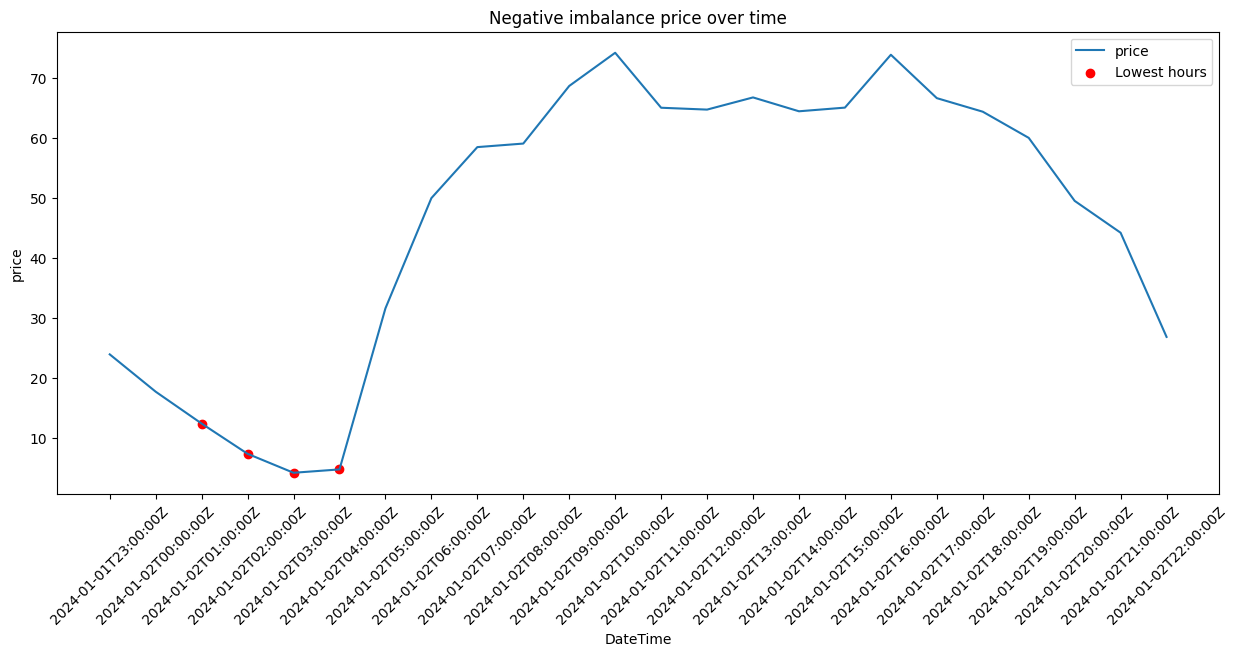

In [29]:
# Assume your dataframe is df
df['DateTime'] = pd.to_datetime(df['date'])  # Ensure DateTime is in the correct format

plt.figure(figsize=(15,6))

# plot all the prices
plt.plot(df['date'], df[price_column_name], label=price_column_name)

# overlay the points where 'is_in_lowest_quarters' is True
plt.scatter(df[df['is_in_lowest_hours_comfort']]['date'], df[df['is_in_lowest_hours_comfort']][price_column_name], color='red', label='Lowest hours')

plt.xlabel('DateTime')
plt.xticks(rotation=45)
plt.ylabel(price_column_name)
plt.title('Negative imbalance price over time')
plt.legend()

plt.show()